In [10]:
import numpy as np
import random



**Probability** is a measure that describes the likelihood of a particular event occurring within a set of possible events. It is expressed on a scale ranging from 0 (indicating that an event is impossible) to 1 (indicating that an event is certain). It can also be expressed as a percentage between 0% and 100%.

Probability provides a framework for quantifying the uncertainty associated with predictions, inferences, decisions and random events. To understand and calculate it, it is essential to understand the following concepts:

- **Experiment**: Any action or procedure that can produce well-defined results. Example: throwing a die.
- **Sample space**: The set of all possible outcomes of an experiment. For the example of the die, the sample space is $S=1,2,3,4,5,6$ (since they are all the possible faces that can come out when rolling a die).
- **Event**: Also called an occurrence, it is the specific subset of outcomes within a sample space. In our example, referring to the event of getting an even number would be represented as $E=2,4,6$ (since all those numbers are even).

The probability of an event is calculated as the ratio of the number of favorable outcomes for that event to the total number of outcomes in the sample space. For example, the probability of getting an even number when rolling a die is:

$P(E)=\frac{3}{6}=0.5$

Let's try this using the `random` library

In [19]:
import random

# Define the sample space for rolling a die
sample_space = [1, 2, 3, 4, 5, 6]

# We can use the random.choice function to randomly sample from a given sample space
random.choice(sample_space)

5

In [20]:
# Function to simulate rolling a die
def roll_die():
    return random.choice(sample_space)

# Function to check if a number is even
def is_even(num):
    return num % 2 == 0

In [30]:
# Simulate rolling the die 10 times
num_trials = 10
outcomes = [roll_die() for _ in range(num_trials)]
outcomes

[2, 5, 6, 5, 5, 3, 4, 2, 6, 4]

In [31]:
# Filter outcomes to get even numbers
even_outcomes = [event for event in outcomes if is_even(event)]
even_outcomes

[2, 6, 4, 2, 6, 4]

In [32]:
# Calculate probability of getting an even number
probability_even = len(even_outcomes) / len(outcomes)
probability_even

0.6

We can also use the `numpy.random` library, and there is more than one way to do this

Method 1.)

In [47]:
# Define the sample space for rolling a die
sample_space = [1, 2, 3, 4, 5, 6]

# Roll the die num_trials times
num_trials = 10
outcomes = np.random.choice(sample_space, size=num_trials)
outcomes

array([1, 4, 3, 4, 4, 3, 5, 5, 2, 2])

In [48]:
# Filter outcomes to get even numbers
even_outcomes = outcomes[outcomes % 2 == 0]
even_outcomes

array([4, 4, 4, 2, 2])

In [49]:
# Calculate probability of getting an even number
probability_even = len(even_outcomes) / len(outcomes)
probability_even

0.5

Method 2.)

In [68]:
# We don't have to explicitly define a sample space if we are drawing random integer
# We can use the numpy.random.randint function
# But be cautious of the upper limit!
# numpy.random.ranint EXCLUDES the upper limit given, so we may have to add one to the upper limit

num_trials = 10
lower_limit = 1
upper_limit = 6
outcomes = np.random.randint(lower_limit, upper_limit+1, size=num_trials)
outcomes

array([5, 5, 2, 4, 1, 5, 5, 3, 3, 2])

In [69]:
even_outcomes = outcomes[outcomes % 2 == 0]
even_outcomes

array([2, 4, 2])

In [70]:
# Calculate probability of getting an even number
probability_even = len(even_outcomes) / len(outcomes)
probability_even

0.3

**Operations Involving Events**

As previously discussed, an **event** represents the outcome of a random **experiment** and is always associated with a **probability**. Frequently, we want to understand how the probabilities of different events relate to each other. This is achieved through various operations involving events.

**Union of Events**

The **union** of two events signifies the occurrence of at *least one* of those events. It is symbolized by $A \cup B$. For instance, if $A$ represents the event of rolling a 2 on a die, and $B$ represents the event of rolling a 3, then $A \cup B$ denotes the event of rolling *either* a 2 or a 3.

Let's show this example using the `random` library 

Suppose we perform ane experiment where we roll a single die many times (100 times).

Let the event that the die is 2 be $A$, and the event that the die is 3 be $B$.

What is the probability that we roll a 2 *or* a 3? i.e. what is $P(A \cup B)$?

We previously showed an example with list comprehensions, we can also show an example without list comprehensions

Remember, there's more than one way to code these experiments

In [107]:
sample_space = [1,2,3,4,5,6]

# Let's perform 100 experiements
num_trials = 100

outcomes = [] # If we don't use list comprehensions, then we must explicitly define our arrays and set them empty
union_events = []
for i in range(num_trials):
    
    outcome = random.choice(sample_space)
    
    outcomes.append(outcome)
    
    if (outcome == 2) or (outcome == 3):
        
        union_events.append(outcome)
        
union_probability = len(union_events)/len(outcomes)  
union_probability


0.4

We can also try this with list comprehensions

In [108]:
outcomes = [random.choice(sample_space) for _ in range(num_trials)]

union_events = [event for event in outcomes if (event == 2) or (event == 3)]

union_probability = len(union_events)/len(outcomes)
union_probability

0.3

You could also do this with `numpy.random`, but I will leave this as an excercise for the reader `;)`

How could we find an equation, or theoretically state, what the probability of a union of two events is?

We can visuzualize probabilities as areas. The proability of the entire sample space (the probability of *something* happening) is 1, so we can imagine this as a box with area 1.

Then the probability of any event can be thought of as a smaller area within that box (the event occurs within the possible sample space). So imagine the below white-space as an area where any possible die roll can occur. 

So we can think of the probability of event $A$ (where the rolled die is 2) as represented by an area

And we can think of the probability of event $B$ (where the rolled die is 3) as represented by another area.

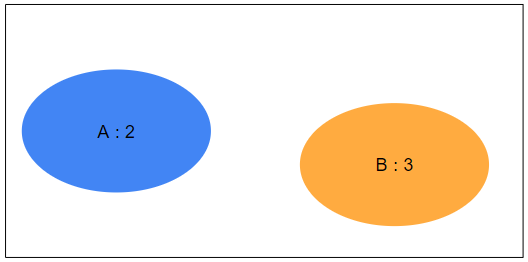

Since our event is of a single die, and a single die can't be **both** 2 and 3 at the same time, we say these two events (the die rolling 2 and the die rolling 3) are **mutually exclusive**. One possiblility, the die rolling 2, excludes the other possbility, the die rolling 3, from happening.

There is no chance that both events occur at the same time, so their probabilities don't "overlap".

So we draw their probability areas are seperate and not overlapping.

What is the probability that either event (the die rolling 2 or 3) will happen?

I.e. what is the $P(A \cup B)$?

Can you use the above diagram to come up with a formula?

For **mutually exclusive events**

$P(A \cup B) = P(A) + P(B)$

For our die example

$P(A=2 \cup B=3) = P(A=2) + P(B=3)$

$P(A=2 \cup B=3) = \frac{1}{6} + \frac{1}{6}$

$P(A=2 \cup B=3) = \frac{1}{3}$

What if we have two events that could possibly coexist?

I.e. they aren't mutually exclusive

An example can occur when drawing cards

Suppose we have a deck of 52 cards. A single card can have one of four suits (♥️, ♦️, ♣️, ♠️) *and* a value: $1,2,3,4,5,6,7,8,9, J, Q, K, A$ 

Since a card can have both a suit and a value, these two possibilities are *not* mutually exclusive

Suppose we ask, what is the probability that a randomly drawn card is a 6 or a diamond?

So let $A = 6$, and $B = ♦️$.

What is $P(A \cup B)$?

Let's take it one step at a time. First. Let's list all the possbilities our deck of cards can have.

We have 13 different cards for each of the four suits. So that's $13 \times 4 = 52$ different possible cards. These possiblities make our sample space.

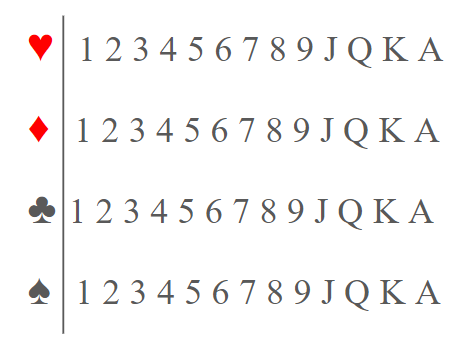

Before asking what is $P(A \cup B)$, let's ask what is the $P(A)$, the probability of picking a card with a value 6?

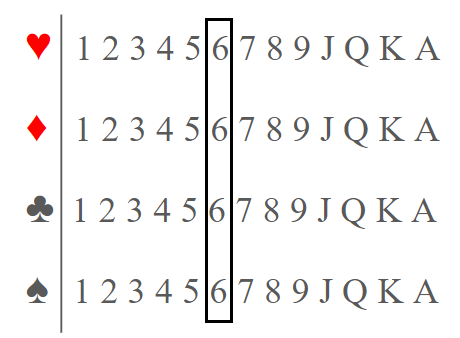

$P(A) = 4/52$

$P(A) = 1/13$

And now, let's seperately ask, what is the probability of drawing a card that has is the suit of diamonds? $P(B)$?

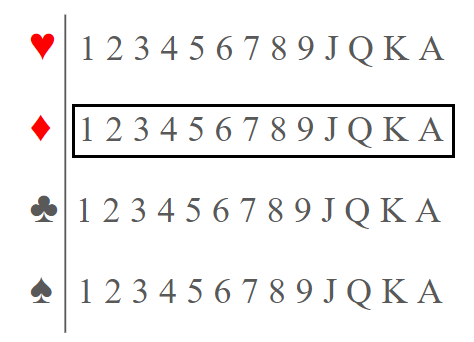

$P(B) = 13/52$

$P(B) = 1/4$

Now let's ask about the probability of the **union** of these two events, the probability of these two events happening together.

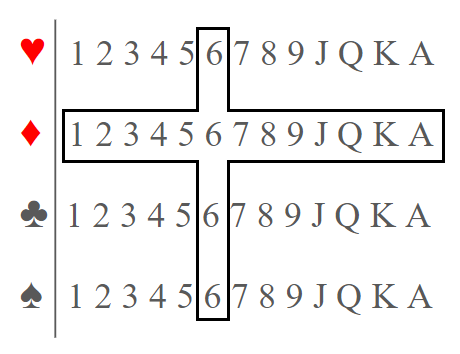

That's 16 possible cards out of 52.

So that's 

$P(A \cup B) = 16/52$

$P(A \cup B) = 4/13$

Notice there is a trick to counting these 16 items, we could count all itmes in the above "cross-like" shape one-by-one.

Or we do the following trick

First, count all the cards with a value of 6, i.e. $A=6$.

Expressed as a probability that's $P(A) = 4/52$

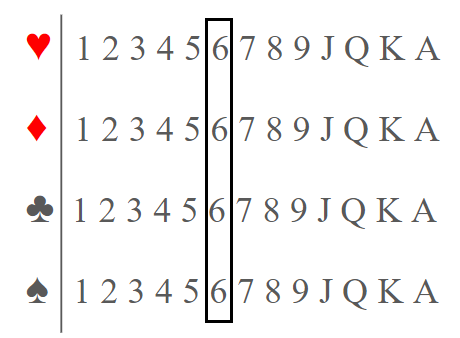

Then add this to the number of diamonds, $B = ♦️$

Expressed as a probability so far, this is

$P(A) + P(B) = 4/52 + 13/52$

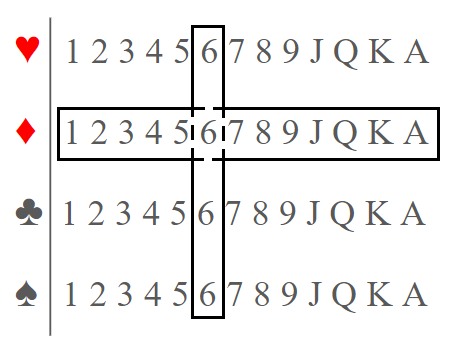

And note that when adding the $A=6$ cards and the $B = ♦️$ cards as we've just done, we've double-counted the $6$ of $♦️$ cards. We've included it twice!

So subtract off the number of $6$ of $♦️$ cards to remove any double counting.

So we have

$P(A) + P(B) - P(A$ and $B) = 4/52 + 13/52 - 1/52$

$P(A) + P(B) - P(A$ and $B) = 17/52 - 1/52$

$P(A) + P(B) - P(A$ and $B) = 16/52 = 4/13$

Note, that if we have events that aren't mutually exclusive, i.e. they can both occur at the same, such as a drawing a card with a 6 and a diamonds, i.e. $A=6$ and $B = ♦️$, then the probability of the union of these two events is

$P(A \cup B) = P(A) + P(B) - P(A$ and $B)$,

we must subtract off the probability of the two events happening together, at the same time.

We visually saw this above with our layout off cards, and we can more generally visualize this below

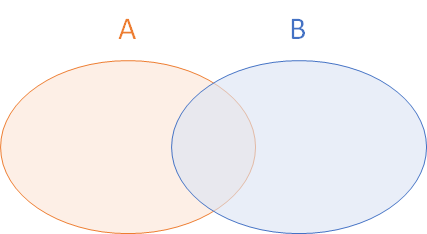

**The Intersection of Events**

When two events *both* occur, like the $6$ and $♦️$ in the above example, we say there is an **intersection** of two events. It is symbolized by $A \cap B$

So the above example utilized an intersection. When we wrote $A\  \text{and}\ B$, we could have written $A \cap B$

So we can write that the probability of an **intersection** of two events, **A** and **B** as

$P(A \cap B)$.

And we can write the probability of a **union** of two events, **A** and **B** as

$P(A \cup B) = P(A) + P(B) - P(A \cap B)$,

where  $P(A \cap B) = 0$ if events $A$ and $B$ are mutually exclusive (can't happen together).

We can visualize the intersection of event $A$ and $B$ below

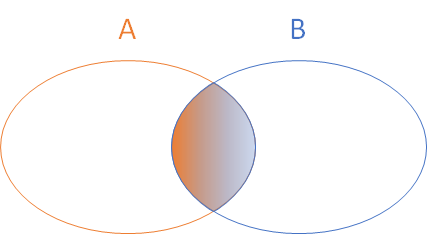

You can think of the intersection as an `and`, and the union as an `or`

So $A \cap B$ is like $A\ \text{and}\ B$,

and $A \cup B$ is like $A\ \text{or}\ B$

The probability of two events occuring simultaneously, $P(A \cap B)$ is also called the **joint probability**

**Complement of Event**

The event that occurs if the given event does not occur. It is denoted by $A′$. For example, if $A$ is the event of getting an even number by rolling a die, then $A'$ is the event of getting an odd number.

The probability of a complement of an event can be given by subtracting the probabiliyt of the event by 1 (or 100%)

So if we have an event of rolling an event number via die represented by $A$ and the probability of this even is $P(A)$, then the probability of the complement (rolling an odd number) is $P(A') = 1 - P(A)$

**Conditional Probabilities**

Conditional probability is the probability of an event occuring given that another event has already occured. It is denoted as $P(A|B)$, which is read as "the probability of event B given event A"

So you can think of this as

$P(B|A)$ means $P(B\ \text{given that we have or know}\ A)$

There is a formula which relates **joint probabilities** (probabilities of intersections) with **conditional probabilities**

$P(B|A) = \frac{P(A \cap B)}{P(A)}$

This formula states that the probability of $B$ given $A$ is equal to the probability of the intersection of $A$ and $B$ divided by the probability of $A$.

Let's look at an example with playing cards

Suppose we have a standard deck of 52 playing cards.

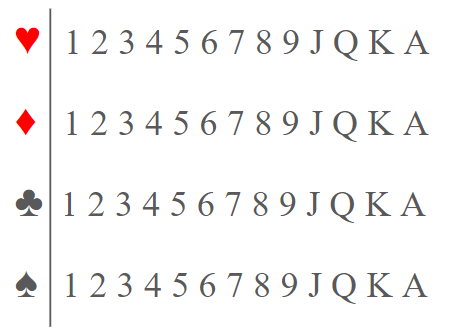

Let event $A$ be drawing a red card (a heart or diamond),

and let event $B$ be drawing a face card (a jack, queen, or king)

Let's ask: What is conditional probability of drawing a face card given that we've drawn a red card? What is $P(B|A)$

This is a conditional probability because we asking about an event (drawing a face card) after knowing we've recorded another event (we've already drawn a red card) 

Let's solve this *without* the above formula first,

Firts, let's introduce our condition. The condition is that we *know* we've already drawn a red card of some sort.

So let's remove all the non-red cards.

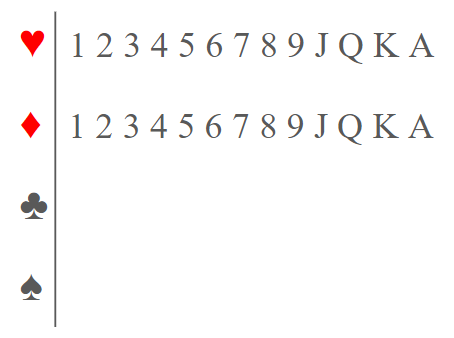

That's our first condition, $A$, that we've already drawn a red card.

We see that given condition $A$ we have a sample space of $2 \times 13 = 26$ cards.

Now we can ask about the probability of drawing a face card (J, Q, K, A) given we have only red cards in our sample space. We're asking about event $B$.

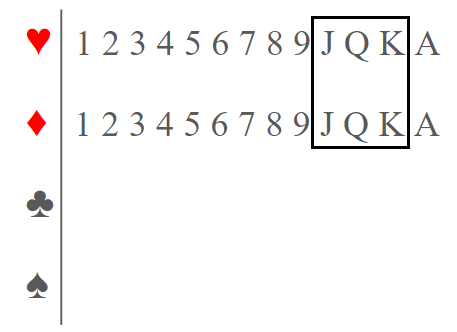

There are six cards out of these 26 that satisfy event $B$ (drawing a face card).

So the probability of drawing a face card (event $B$) given that we have already drawn a red card (event $A$) is

$P(B|A) = 6/26 = 3/13$

We've solved a conditional probability question through visualizing the possiblities, and visualizing our given condition $A$ (drawing a red card)

We can also solve this using the formula relating conditional to joint probabilities

$P(B|A) = \frac{P(A \cap B)}{P(A)}$

Let's do that.

Recall, event $A$ is drawing a red card (a heart or diamond)

And event $B$ is drawing a face card (a jack, queen, or king)

And we ask: What is conditional probability of drawing a face card given that we've drawn a red card? What is $P(B|A)$

Let's both parts of the right-hand side of the equation.

So first, what is $P(A)$?

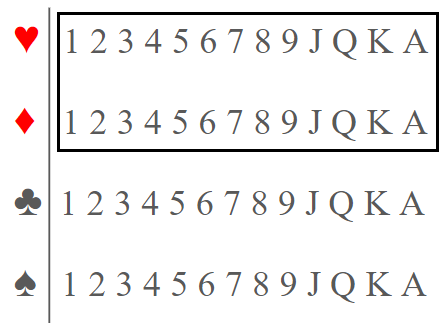

There are 52 cards in total, 26 of them are red.

$P(A) = 26/52 = 1/2$

And what is $P(A \cap B)$, the probability of drawing both a red and face card?

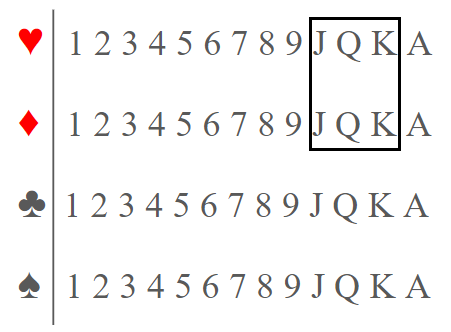

There are 6 cards that *are both* red and face cards out of 52 total cards

$P(A \cap B) = 6/52 = 3/26$

Using the above formula relating conditional and join probabilities,

$P(B|A) = \frac{P(A \cap B)}{P(A)}$

$P(B|A) = \frac{6/52}{26/52}$

$P(B|A) = 6/26$

This is what we found earlier!

**Bayes' Theorem**

Bayes' theorem is a fundamental principle in statistics that allows us to update our beliefs or probabilities based on new evidence or information.

Bayes' Formula relates conditional probabilities of different events. It can be useful as it can be easily rearranged if we need to solve for a particular probability given some information.

The formula is below

$P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}$

This can also be written as

$P(A|B) \times P(B) = P(B|A) \times P(A)$


Let's do the example givein in the pre-work.

Let's imagine we have a bag with 100 marbles: 30 are red and 70 are blue. If we draw a marble at random, the probability that it is **red is 30%** and the probability that it is **blue is 70%**. Now, suppose a friend, unseen by us, picks a marble out of the bag and says, **"The marble I picked has stripes on it."** If we now knew that **50% of the red marbles have stripes** and only **10% of the blue marbles have stripes**, given this new information, **what is the probability that the marble our friend chose is red?** This is where Bayes' theorem applies.

Let's start by writing what we know

Let $R$ represent the set of red marbles

Let $B$ represent the set of blue marbles

Let $S$ represent the set of striped marbles.

Note that a marble can be striped and red (or blue), so these are not mutually exclusive.

$P(R) = 0.3$

$P(B) = 0.7$

$P(S|R) = 0.5$

$P(S|B) = 0.1$

This question asks: What is $P(R|S)$, becuase our we know our friend drew a striped marble ($S$), what is the probability the marble they drew is red?

Note the conceptual difference between $P(R)$ and $P(R|S)$!

Bayes' theorem can be used here because we have an experimental result, our friend drew a striped marble, and we can use this to result update the probability that the marble chosen is red.

To evaluate this, first I like to write out Bayes' theorem in the below manner

$P(S|R) P(R) = P(R|S) P(S)$

We want to find $P(R|S)$, so we can rearrange the above as

$P(R|S) P(S) = P(S|R) P(R)$

$P(R|S) = \frac{P(S|R) P(R)}{P(S)}$

$P(R|S) = \frac{0.5 \times 0.3}{P(S)}$

We have $P(S|R)$ and $P(R)$, but how do we get $P(S)$ (the probability a marble is striped)?

We can do this visually!

First, imagine the below box as containing all marbles, of all colors, striped and unstriped

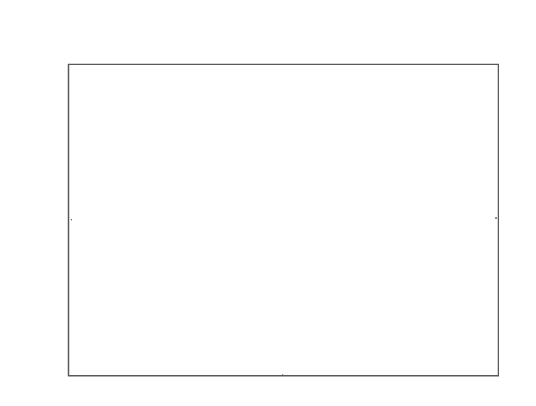

We can visualize the probabilities as different areas of this box. 

Suppose we divided the box into blue $B$ and red $R$ marbles.

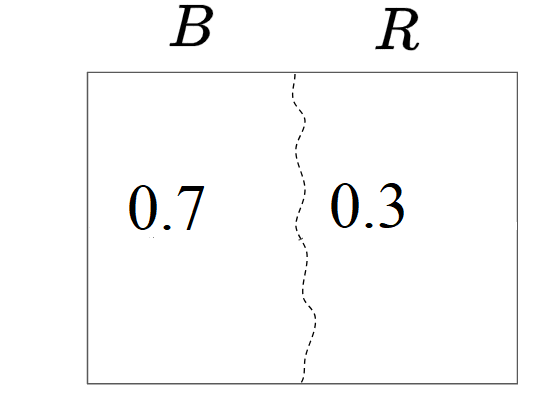

We can also divide the box into the striped $S$ and non-striped $\neg S$ sections, but we don't know the probabilities associated with this division.

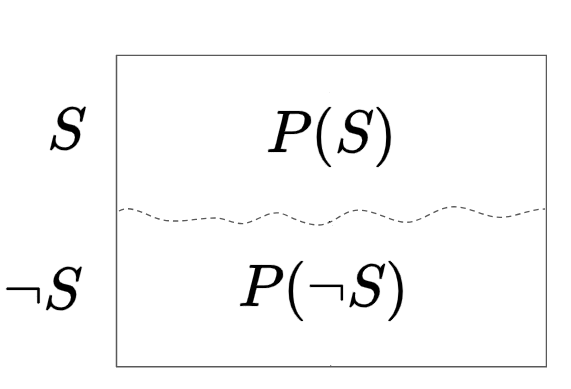

And we can include both splits, $B$ vs $R$ and $S$ vs $\neg S$

This splits the box of marbles into four different **joint probabilities**

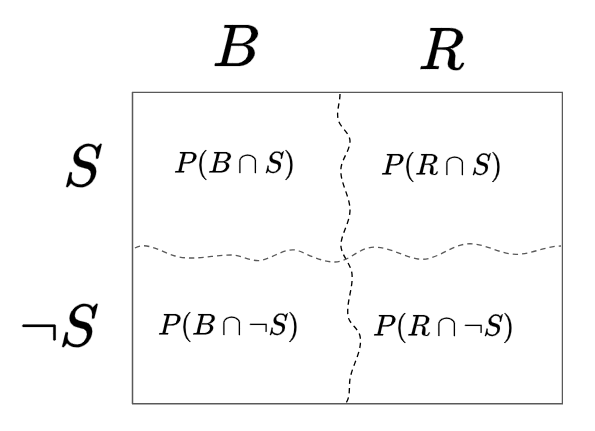

So we can write $P(S)$ as 

$P(S) = P(B \cap S) + P(R \cap S)$

We were given the following:
    
$P(R) = 0.3$

$P(B) = 0.7$

$P(S|R) = 0.5$

$P(S|B) = 0.1$
    
    

Do we know $P(B \cap S)$ or $P(R \cap S)$? Can we find it?

Recall there is a formula that relates conditional to joint probabilities

$P(B|A) = \frac{P(A \cap B)}{P(A)}$

We can rearrange this as

$P(A \cap B) = P(B|A) P(A)$

For our marble examples we can write this as

$P(B \cap S) = P(S|R) P(R)$ and

$P(R \cap S) = P(S|B) P(B)$

So the probability of the marble being blue and striped is equal to the conditional probability of the marble beign striped given that it is red multiplied by the probability the marble is red in the first place.

And likewise for the probability o the marble being red and striped...

The point of doing this is that we have the values of $P(S|R)$, $P(S|B)$, $P(R)$, and $P(B)$!

And we can use these to find $P(S)$

$P(S) = P(B \cap S) + P(R \cap S)$

$P(S) = P(S|B) P(B) + P(S|R) P(R)$

$P(S) = 0.1 \times 0.7 + 0.5 \times 0.3$

$P(S) = 0.22$

Now we can plug this into Bayes' Formula to find the conditional probability that the marble our friend drew was red, given that we know our friend drew a striped marble.

$P(R|S) = \frac{P(S|R) P(R)}{P(S)}$

$P(R|S) = \frac{0.5 \times 0.3}{P(S)}$

$P(R|S) = \frac{0.5 \times 0.3}{0.22}$

$P(R|S) = 0.6818 = 68.2\%$

In [133]:
P_red = 0.3  # Probability of selecting a red marble
P_blue = 0.7  # Probability of selecting a blue marble
P_stripes_given_red = 0.5  # Probability of stripes given a red marble
P_stripes_given_blue = 0.1  # Probability of stripes given a blue marble

# Probability of the marble being striped
P_stripes = (P_stripes_given_red * P_red) + (P_stripes_given_blue * P_blue)

# Calculate the probability of selecting a red marble given stripes
P_red_given_stripes = (P_stripes_given_red * P_red) / P_stripes

P_red_given_stripes

0.6818181818181819

In [136]:
P_heads_biased = 0.7  # Probability of landing heads with the biased coin
P_heads_fair = 0.5  # Probability of landing heads with the fair coin
P_biased = 0.5  # Probability of selecting the biased coin initially
P_fair = 0.5  # Probability of selecting the fair coin initially

# Define a function to update probabilities using Bayes' theorem
def update_probability(P_coin_given_heads, P_heads_given_coin, P_coin):
    # Apply Bayes' theorem
    numerator = P_heads_given_coin * P_coin
    denominator = (P_heads_given_coin * P_coin) + ((1 - P_heads_given_coin) * (1 - P_coin))
    return numerator / denominator

# Define the number of iterations
iterations = 10

# Iterate to update probabilities
for i in range(iterations):
    # Flip the selected coin
    flip_result = 'H'  # Assume heads for this example
    
    # Update probabilities based on the flip result
    P_biased = update_probability(P_biased, P_heads_biased if flip_result == 'H' else (1 - P_heads_biased), P_biased)
    P_fair = update_probability(P_fair, P_heads_fair if flip_result == 'H' else (1 - P_heads_fair), P_fair)
    
    # Print updated probabilities
    print(f"Iteration {i+1}: Probability of biased coin: {P_biased:.4f}, Probability of fair coin: {P_fair:.4f}")

Iteration 1: Probability of biased coin: 0.7000, Probability of fair coin: 0.5000
Iteration 2: Probability of biased coin: 0.8448, Probability of fair coin: 0.5000
Iteration 3: Probability of biased coin: 0.9270, Probability of fair coin: 0.5000
Iteration 4: Probability of biased coin: 0.9674, Probability of fair coin: 0.5000
Iteration 5: Probability of biased coin: 0.9857, Probability of fair coin: 0.5000
Iteration 6: Probability of biased coin: 0.9938, Probability of fair coin: 0.5000
Iteration 7: Probability of biased coin: 0.9974, Probability of fair coin: 0.5000
Iteration 8: Probability of biased coin: 0.9989, Probability of fair coin: 0.5000
Iteration 9: Probability of biased coin: 0.9995, Probability of fair coin: 0.5000
Iteration 10: Probability of biased coin: 0.9998, Probability of fair coin: 0.5000


In [162]:
class Coin():
    
    def __init__(self, p_heads = 0.5, p_tails = 0.5):
        
        assert p_heads + p_tails == 1.0
        
        self.p_H = p_heads
        self.p_T = p_tails
        
    def flip_coin(self):
        
        sample_space = ['H', 'T']
        
        return np.random.choice(sample_space, p=[self.p_H, self.p_T])
        
    

In [163]:
coin = Coin(0.9, 0.1)

In [164]:
coin

In [165]:
coin.flip_coin()

'T'